In [1]:
%matplotlib widget

import pickle
import pandas as pd
import dtale
import datetime
import matplotlib.pyplot as plt
import tabloo

In [2]:
with open('treasuries.pkl', 'rb') as f:
  data = pickle.load(f)

df = pd.DataFrame(data)
df.columns = ['date','cusip','description','coupon','maturity','call','buy','sell','end-of-day-price']
df = df.drop(['description','call','buy','sell'], axis=1)
df['end-of-day-price'] = df['end-of-day-price'].astype('float')
df['coupon'] = [float(i[0:-1]) for i in df['coupon']]
df['maturity'] = [datetime.datetime.strptime(i,'%m/%d/%Y') for i in df['maturity']]
print(len(df))

720049


In [3]:
dtale.show(df)

In [30]:
year = 2023
month = 9
day = 12

cusipList = list(set(df[df['maturity'] == datetime.datetime(year=year, month=month, day=day)]['cusip']))
cusipList

['912797GS0']

In [79]:
cusip = cusipList[0]
cusip = '912797GS0'

thisTreasury = df[df['cusip'] == cusip].sort_values('date')
dtale.show(thisTreasury)

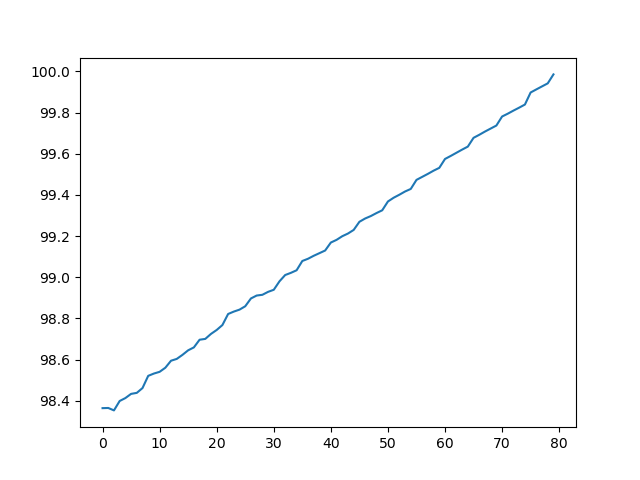

In [78]:
plt.figure()
plt.plot(thisTreasury['end-of-day-price'].to_numpy()[0:-1])
plt.show()

In [87]:
termDict = {}

earliestDate = df['date'].min()
for thisCusip in set(df['cusip']):
    dfCusip = df[df['cusip'] == thisCusip]
    minDate = dfCusip['date'].min()
    if minDate > earliestDate:
        maturity = dfCusip['maturity'].iloc[0]
        termLength = ((maturity - minDate).days)/7
        termDict[thisCusip] = termLength
    else:
        termDict[thisCusip] = 0

set([i for i in termDict.values()])

{0,
 0.42857142857142855,
 1.1428571428571428,
 2.0,
 2.4285714285714284,
 2.5714285714285716,
 4.857142857142857,
 5.0,
 5.285714285714286,
 6.428571428571429,
 6.857142857142857,
 7.571428571428571,
 7.714285714285714,
 7.857142857142857,
 8.0,
 8.142857142857142,
 9.571428571428571,
 9.857142857142858,
 14.571428571428571,
 14.714285714285714,
 15.0,
 16.857142857142858,
 17.0,
 17.142857142857142,
 17.571428571428573,
 22.0,
 25.857142857142858,
 26.0,
 26.142857142857142,
 52.0,
 103.85714285714286,
 104.0,
 104.14285714285714,
 104.28571428571429,
 104.42857142857143,
 156.14285714285714,
 156.28571428571428,
 156.42857142857142,
 156.57142857142858,
 258.57142857142856,
 258.7142857142857,
 258.85714285714283,
 259.0,
 259.14285714285717,
 260.42857142857144,
 260.57142857142856,
 260.7142857142857,
 260.85714285714283,
 261.0,
 364.7142857142857,
 364.85714285714283,
 365.0,
 365.14285714285717,
 365.2857142857143,
 519.4285714285714,
 519.5714285714286,
 519.7142857142857,
 51